In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
import pickle


In [86]:
dataset = pd.read_csv('amazon_product_reviews.csv')

In [87]:
print(dataset.info())
print("\n")
print("Dataset Shape:",dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

In [88]:
dataset.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0


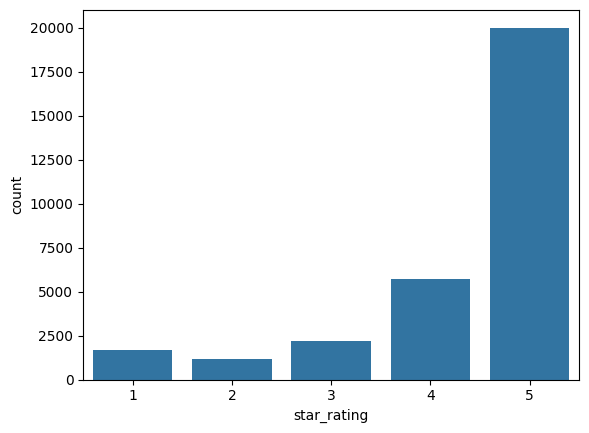

In [89]:
plt.show( sns.countplot(x="star_rating", data=dataset))

In [90]:
dataset.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'sentiment'],
      dtype='object')

In [91]:
# let's remove customer_id, review_id, product_id and product_parent because these columns gives us no helpful information
dataset_clean = dataset.drop(['customer_id', 'review_id', 'product_id', 'product_parent'], axis=1)

In [92]:
dataset_clean.head(2) # We can still remove columns, actually our interest is to analyze the text "review_body" column and output the sentiment column

,marketplace,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0


In [93]:
dataset_clean = dataset_clean.drop(['vine','product_category','marketplace', 'product_category', 'star_rating'], axis=1)

In [94]:
dataset_clean.head(2)
dataset_clean = dataset_clean.drop(['helpful_votes', 'total_votes', 'verified_purchase', 'review_date'], axis=1)

In [95]:
dataset_clean = dataset_clean.dropna(axis=0)

In [96]:
dataset_clean.head(5) # So now we have a clean dataset, we could still remove product_title and review_headline, but we will keep them for now

,product_title,review_headline,review_body,sentiment
0,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Five Stars,Great love it,1
1,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,0
2,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Well thought out device,Excellent unit. The versatility of this table...,1
3,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,1
4,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Five Stars,All Amazon products continue to meet my expect...,1


In [97]:
# BAGS OF WORDS
# let's normalize each word in the review_body column to lower case
dataset_clean['review_body'] = dataset_clean['review_body'].str.lower()

In [98]:
dataset_clean.head(5)

,product_title,review_headline,review_body,sentiment
0,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Five Stars,great love it,1
1,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Lots of ads Slow processing speed Occasionally...,lots of ads<br />slow processing speed<br />oc...,0
2,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Well thought out device,excellent unit. the versatility of this table...,1
3,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Not all apps/games we were looking forward to ...,i bought this on amazon prime so i ended up bu...,1
4,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Five Stars,all amazon products continue to meet my expect...,1


In [99]:
#let's remove <br /> tags for review_body column
dataset_clean['review_body'] = dataset_clean['review_body'].str.replace('<br />', '')

In [100]:
dataset_clean.head(2) # This is preprocessing step, necessary to normalize data

,product_title,review_headline,review_body,sentiment
0,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Five Stars,great love it,1
1,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",Lots of ads Slow processing speed Occasionally...,lots of adsslow processing speedoccasionally s...,0


In [101]:
dataset_clean = dataset_clean.drop(['product_title', 'review_headline'], axis=1)

In [102]:
X = dataset_clean['review_body']
y = dataset_clean['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24672,) (6168,) (24672,) (6168,)


In [120]:
vectorizer = CountVectorizer()

In [121]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [123]:
features_names = vectorizer.get_feature_names_out()

In [127]:
print(features_names)
print(len(features_names))
print(features_names[-20:])

['00' '000' '0093060644271ehd06' ... 'zooms' 'zynga' 'òrdered']
13736
['zeushad' 'zigsaw' 'zilch' 'zillion' 'zinio' 'zip' 'zipper' 'zipping'
 'zippy' 'zire' 'zombie' 'zombies' 'zone' 'zones' 'zoodles' 'zoom'
 'zooming' 'zooms' 'zynga' 'òrdered']


In [128]:
vectorizer.vocabulary_

{'it': 6725,
 'exactly': 4438,
 'what': 13343,
 'was': 13244,
 'looking': 7424,
 'for': 5040,
 'will': 13428,
 'protect': 9604,
 'my': 8106,
 'fire': 4866,
 'but': 2072,
 'thin': 12248,
 'enought': 4275,
 'to': 12387,
 'slip': 11166,
 'into': 6600,
 'purse': 9699,
 'the': 12198,
 'fabric': 4628,
 'be': 1522,
 'easy': 4064,
 'keep': 6912,
 'clean': 2497,
 'and': 976,
 'matches': 7686,
 'new': 8245,
 '34': 245,
 'perfectly': 8983,
 'surprised': 11888,
 'how': 6093,
 'quickly': 9755,
 'delivered': 3407,
 'great': 5568,
 'delivery': 3411,
 'product': 9516,
 'only': 8556,
 'problem': 9489,
 'ihave': 6212,
 'is': 6690,
 'size': 11092,
 'small': 11192,
 'however': 6098,
 'fastest': 4718,
 'most': 8024,
 'dependable': 3443,
 'tablet': 11990,
 've': 13030,
 'had': 5679,
 'am': 907,
 'having': 5792,
 'problems': 9491,
 'accessing': 573,
 'books': 1834,
 'free': 5132,
 'did': 3571,
 'find': 4839,
 'on': 8543,
 'store': 11637,
 'kindle': 6975,
 'there': 12222,
 'didn': 3576,
 'seem': 10764,
 'big'

In [180]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
#let's use pickle to save the model
pickle.dump(nb, open('model.pkl', 'wb'))

In [134]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.9151669909208819
0.9002918287937743


In [135]:
pred_nb = nb.predict(X_test)
confusion = confusion_matrix(y_test, pred_nb)
print(confusion)

[[ 647  380]
 [ 235 4906]]


In [181]:
test = "I like it"
test_two = "It's horrible "
nb.predict(vectorizer.transform([test,test_two]))
#So as we can see the first sentence is positive and the second is negative
#This is not so accurate, it depends by the sentence, the next model will be trained on more datas, that i think would improve the accuracy.


array([1, 0], dtype=int64)